In [114]:
import json

In [115]:
met = ! find -iname "metrics.json"

In [116]:
met

['./my_runs/179/metrics.json',
 './my_runs/124/metrics.json',
 './my_runs/56/metrics.json',
 './my_runs/225/metrics.json',
 './my_runs/21/metrics.json',
 './my_runs/218/metrics.json',
 './my_runs/206/metrics.json',
 './my_runs/186/metrics.json',
 './my_runs/99/metrics.json',
 './my_runs/195/metrics.json',
 './my_runs/39/metrics.json',
 './my_runs/217/metrics.json',
 './my_runs/96/metrics.json',
 './my_runs/173/metrics.json',
 './my_runs/153/metrics.json',
 './my_runs/135/metrics.json',
 './my_runs/159/metrics.json',
 './my_runs/228/metrics.json',
 './my_runs/149/metrics.json',
 './my_runs/202/metrics.json',
 './my_runs/113/metrics.json',
 './my_runs/181/metrics.json',
 './my_runs/62/metrics.json',
 './my_runs/92/metrics.json',
 './my_runs/143/metrics.json',
 './my_runs/38/metrics.json',
 './my_runs/191/metrics.json',
 './my_runs/201/metrics.json',
 './my_runs/44/metrics.json',
 './my_runs/65/metrics.json',
 './my_runs/52/metrics.json',
 './my_runs/187/metrics.json',
 './my_runs/200/met

In [117]:
dics = []
for m in met:
    with open(m) as f:
        distros_dict = json.load(f)
        distros_dict['run'] = m
        dics.append(distros_dict)
        

In [118]:
dics

[{'F1_macro': {'steps': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18],
   'timestamps': ['2018-11-14T04:09:13.057550',
    '2018-11-14T04:09:36.707868',
    '2018-11-14T04:10:04.246122',
    '2018-11-14T04:10:31.195554',
    '2018-11-14T04:10:59.985639',
    '2018-11-14T04:11:34.114753',
    '2018-11-14T04:12:03.109587',
    '2018-11-14T04:12:29.464763',
    '2018-11-14T04:12:56.984198',
    '2018-11-14T04:13:25.941283',
    '2018-11-14T04:14:13.047841',
    '2018-11-14T04:14:59.079810',
    '2018-11-14T04:15:45.014567',
    '2018-11-14T04:16:38.697167',
    '2018-11-14T04:17:30.061264',
    '2018-11-14T04:18:16.565189',
    '2018-11-14T04:19:08.805393',
    '2018-11-14T04:19:57.772419',
    '2018-11-14T04:20:51.084392'],
   'values': [0.11208053691275166,
    0.11208053691275166,
    0.11208053691275166,
    0.11208053691275166,
    0.11208053691275166,
    0.11208053691275166,
    0.112080536

In [121]:
metric = 'valid_loss'

In [123]:
sorted([(max(x[metric]['values']), x['run']) for x in dics if metric in x], key=lambda x: x[0])

[(1.24956476688385, './my_runs/218/metrics.json'),
 (1.2640273571014404, './my_runs/193/metrics.json'),
 (1.3021454811096191, './my_runs/106/metrics.json'),
 (1.3091435432434082, './my_runs/203/metrics.json'),
 (1.332303524017334, './my_runs/197/metrics.json'),
 (1.3326809406280518, './my_runs/194/metrics.json'),
 (1.334335207939148, './my_runs/205/metrics.json'),
 (1.3385719060897827, './my_runs/112/metrics.json'),
 (1.340911626815796, './my_runs/143/metrics.json'),
 (1.3410652875900269, './my_runs/113/metrics.json'),
 (1.3416833877563477, './my_runs/190/metrics.json'),
 (1.344254970550537, './my_runs/52/metrics.json'),
 (1.3455499410629272, './my_runs/158/metrics.json'),
 (1.3466477394104004, './my_runs/89/metrics.json'),
 (1.3474431037902832, './my_runs/127/metrics.json'),
 (1.3689144849777222, './my_runs/225/metrics.json'),
 (1.3699321746826172, './my_runs/109/metrics.json'),
 (1.3718445301055908, './my_runs/123/metrics.json'),
 (1.3733927011489868, './my_runs/152/metrics.json'),
 

In [59]:
%load_ext autoreload
%autoreload 2


from fastai.text import *
from fastai.text.data import DataBunch
from fastai.datasets import *
from pathlib import Path
import pandas as pd
from fastai.metrics import *
from fastai.train import *
from fastai.vision import *
from fastai.imports import nn, torch
from sklearn import metrics
from fastai.callbacks import *
from fastai.basic_train import get_preds

import sklearn.metrics
import datetime
import news_utils
from pathlib import Path

import fastai
fastai.__version__

'1.0.23.dev0'

In [60]:
EX_PA = Path('/mnt/data/group07/johannes/ynacc_proc/replicate/lmmodels')

In [62]:
data_clas = TextClasDataBunch.load(EX_PA, 'textclassent', bs=50)

In [63]:
learn = text_classifier_learner(data_clas)

In [109]:
# exp_id = '2018_11_14_07_19_11_245530'
# exp_id = '2018_11_14_06_11_35_580544'
# exp_id = '2018_11_14_06_25_58_432493'
exp_id = '2018_11_14_04_06_57_493335' # best macro

In [110]:
learn.load(exp_id)

TextClassifierLearner(data=<fastai.text.data.TextClasDataBunch object at 0x7f9fe6ddad68>, model=SequentialRNN(
  (0): MultiBatchRNNCore(
    (encoder): Embedding(42539, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(42539, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.4)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_runnin

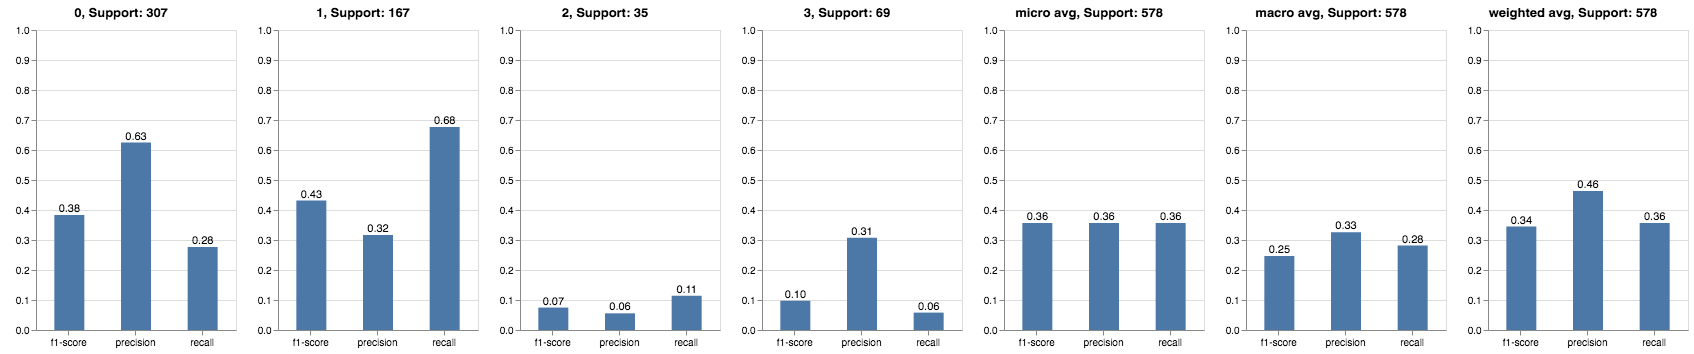

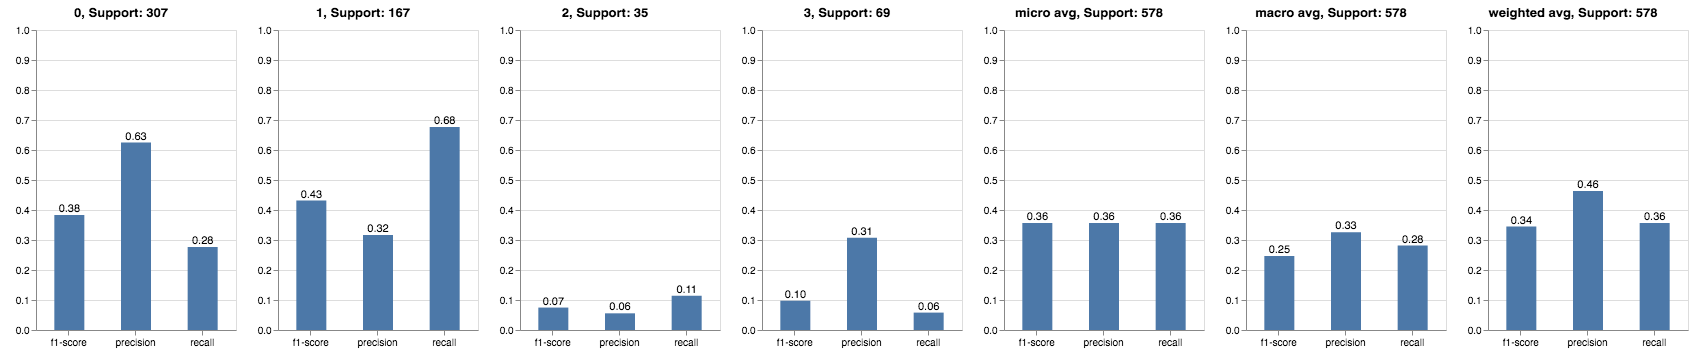

In [111]:
news_utils.plot.plot_class_report(learn)